In [39]:
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']



In [40]:
def consensus(g):
    #a function to test if the network has reached a consensus
    n = 0 #the number of nodes whose states are different with the first node's
    for i in range(len(g.nodes)):
        if g.nodes[1]['state'] != g.nodes[i]['state']:
            n += 1
    if n > 0: 
        return False
    if n<0: 
        return True 

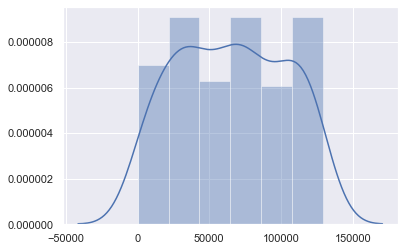

In [44]:
step = 0 #the initial step
lstep = [] #the list of steps in each
for i in range(200):
 #a for loop to get 200 step samples
    initialize()
    while consensus(g) == False:
        update()
        step +=1
    lstep.append(step)
sns.distplot(lstep)

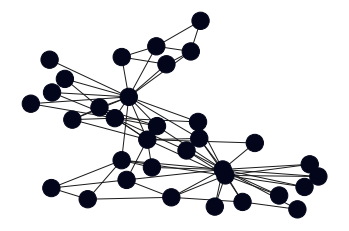

In [42]:
initialize()
for i in range(int(np.mean(lstep))):
    update()
observe()